yt : [INFO     ] 2022-10-26 12:34:48,614 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 12:34:48,616 Creating volume
yt : [INFO     ] 2022-10-26 12:34:48,820 Creating transfer function
yt : [INFO     ] 2022-10-26 12:34:48,822 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


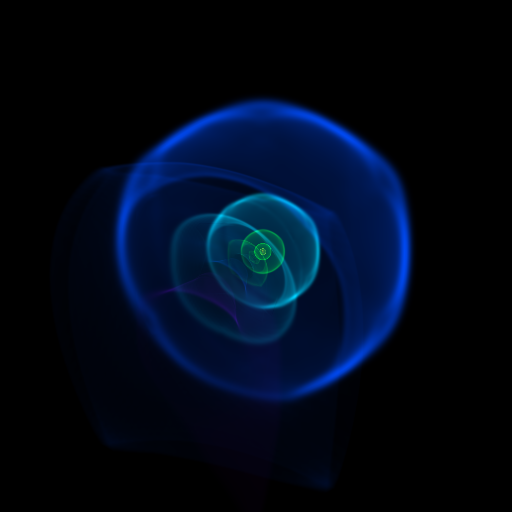

In [246]:
sc = yt.create_scene(ds, "density", lens_type='plane-parallel')
sc.show()

yt : [WARNING  ] 2022-10-26 12:36:32,285 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-10-26 12:36:32,286 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 12:36:32,295 Creating volume
yt : [INFO     ] 2022-10-26 12:36:33,763 Saving rendered image to /mnt/local/thomas/volume.png
yt : [INFO     ] 2022-10-26 12:36:34,114 Rendering scene (Can take a while).


ImageArray([[[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            ...,

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0.

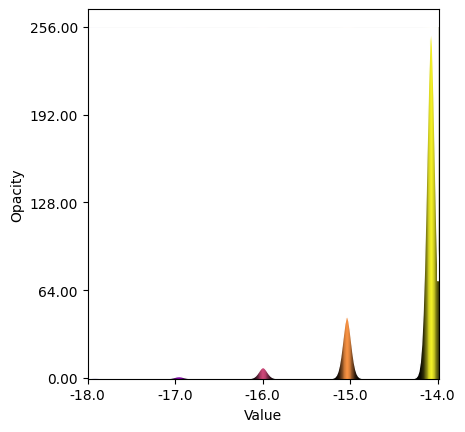

In [248]:
source = sc[0]
source.set_field(("gas", "density"))
source.set_log(True)
bounds = (1e-18,1e-14)

tf= yt.ColorTransferFunction(np.log10(bounds))



# def linramp(vals, minval, maxval):
#         return (vals - vals.min()) / (vals.max() - vals.min())


# tf.map_to_colormap(
#     np.log10(1e-19), np.log10(1e-14), colormap="plasma", scale_func=linramp
# )

# tf.add_gaussian(location=-16, width=0.005, height=[1,0,0,0.0025])
# tf.add_gaussian(location=-15, width=0.005, height=[0.5,1,1,0.04])

tf.add_layers(5, w=0.005, colormap="plasma")

tf.show()

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot("/mnt/local/thomas/transfer_function.png", profile_field="density")

sc.save("/mnt/local/thomas/volume.png", sigma_clip=4.0)

cam = sc.camera
cam.resolution = (1024, 1024)
# cam.position = ds.domain_center + np.array([0.0, 0.0, 0.0])
# cam.focus = ds.domain_center
cam.north_vector = [0, 1, 0]
cam.switch_orientation(normal_vector=[1, 0, 0], north_vector=[0, 1, 0])
# cam.zoom(1.0)
sc.render()
# for i in cam.iter_rotate(np.pi, 5):
#     im = sc.render()
#     sc.save("/mnt/local/thomas/yt_images/rotation_dens2%04i.png" % (i+1), sigma_clip=4.0)


In [237]:
im, sc = yt.volume_render(ds, "temperature")
cam = sc.camera
for i in cam.iter_rotate(np.pi, 30):
    im = sc.render()
    sc.save("rotation_temp%04i.png" % (i+1))

yt : [INFO     ] 2022-10-26 09:04:44,120 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 09:04:44,123 Creating volume
yt : [INFO     ] 2022-10-26 09:04:44,303 Creating transfer function
yt : [INFO     ] 2022-10-26 09:04:44,304 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2022-10-26 09:04:45,496 Found previously rendered image to save.
yt : [INFO     ] 2022-10-26 09:04:45,497 Saving rendered image to AMRGridData_Render_temperature.png
yt : [INFO     ] 2022-10-26 09:04:45,605 Rendering scene (Can take a while).
yt : [WARNING  ] 2022-10-26 09:04:46,740 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-10-26 09:04:46,743 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 09:04:47,888 Saving rendered image to /mnt/local/thomas/yt_images/wr140_temp/rotation_temp0001.png
yt : [INFO     ] 2022-10-26 0

In [238]:
# for i in cam.iter_zoom(1.5, 10):
#     # sc.render()
#     sc.save(f"/mnt/local/thomas/rotate_{i:04d}.png")

In [215]:
# source = sc[0]
# source.set_field("density")
# source.set_log(True)



In [216]:
# bounds = (1e-13,1e-9)
# tf = yt.ColorTransferFunction(x_bounds=np.log10(bounds))

# # tf.add_gaussian(location=-15, width=0.003, height=[1,0,0,0.05]) 
# # tf.add_gaussian(location=-14,width=0.005,height=[0.5,1,1,0.05])

# tf.add_layers(N=3, colormap='arbre')

# print(tf)


In [217]:
# source.tfh.tf = tf
# source.tfh.bounds = bounds
# source.tfh.plot('transferFunction.png', profile_field="density")

In [218]:
# tf.show()

In [219]:
# sc.show()